#Assignment-3

<h2> Part 1- Simple Linear Regression <h2>

Linear regression is among the simplest regression methods. One of the main
advantages of using it is ease of interpreting results. Simple linear regression is special
case of regression where target feature is dependent on single variable, and then we
find the best fitting line.<br>
y = m*x + c<br>

**Objective** <br>
To gain understanding of single linear regression through implementing the model from
scratch

**Tasks** <br>
1. Read the data from above mentioned dataset and define X and y as numpy array
2. Add column at position 0 with all values=1 (pandas.DataFrame.insert function)
3. Print rows from 40 to 55.
4. Print the shape and datatype of both X and y
5. Implement simple linear regression from scratch
6. Write hypothesis function to predict values
7. Write function for calculating mean_squared_error
8. Write function to return gradients for given weights
9. Perform gradient descent taking help of above functions
10. Remove outliers, train again and see the difference in error.
11. Replace "weights = np.random.rand(2)" line in gradient descent with below line,
train again and visualize results.
1. Play with learning rate and max_iterations
2. Generalize the code for multivariate(multiple) linear regression

Rows 40 to 55:
    G2   G3
40  50   55
41  60   60
42  90   90
43  40   55
44  50   45
45  40   30
46  60   55
47  95  100
48  75   70
49  35   35
50  65   65
51  65   65
52  55   50
53  50   55
54  65   65
55  45   50
Shape of X: (395, 2), Datatype of X: float64
Shape of y: (395, 1), Datatype of y: int64
Trained weights: [nan nan]


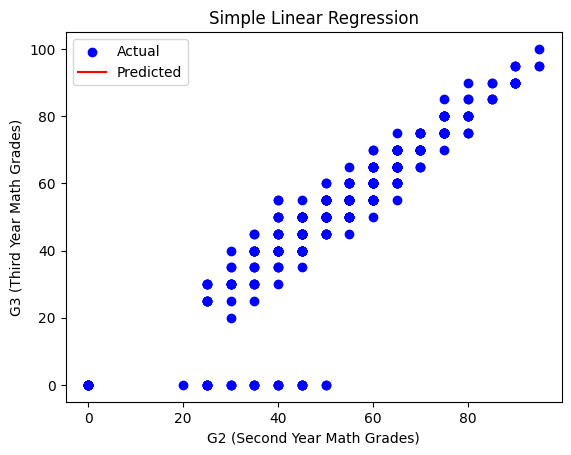

Mean Squared Error: nan
Too many outliers removed. Using original data.
Mean Squared Error removing outliers: nan


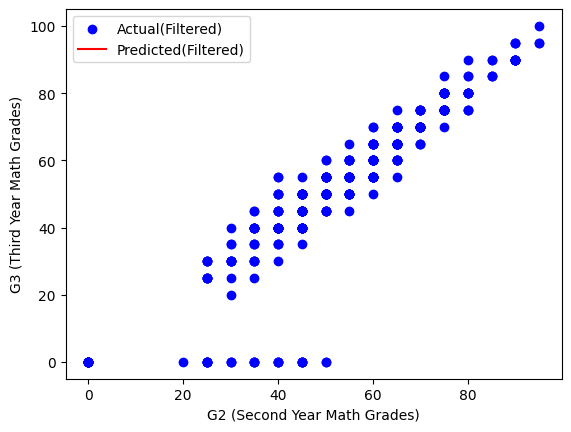

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
url="https://github.com/mishravipul/data/raw/main/simple_linear_data.csv"
data=pd.read_csv(url)

#define X and y as numpy array
X=data['G2'].values.reshape(-1,1)
y=data['G3'].values.reshape(-1,1)

#Add column at position 0 with all values=1
X=np.c_[np.ones(X.shape[0]),X]

#Print rows from 40 to 55.
print("Rows 40 to 55:")
print(data.iloc[40:56])

#Print the shape and datatype of both X and y
print(f"Shape of X: {X.shape}, Datatype of X: {X.dtype}")
print(f"Shape of y: {y.shape}, Datatype of y: {y.dtype}")

# Hypothesis function
def hypothesis(X,weights):
  return np.dot(X,weights)

# mean squared error function
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

# Gradient calculation function
def compute_gradients(X,y,weights):
  predictions=hypothesis(X,weights)
  errors=predictions-y
  gradients=(1/len(y))*np.dot(X.T,errors)
  return gradients

# gradient descent function
def gradient_descent(X,y,learning_rate=0.01,max_iterations=1000):
  weights=np.random.rand(X.shape[1],1)  #initial weights
  for i in range(max_iterations):
    gradients=compute_gradients(X,y,weights)
    weights-=learning_rate*gradients
  return weights

#training the model
weights=gradient_descent(X,y)
print(f"Trained weights: {weights.ravel()}")

#making predictions
y_pred=hypothesis(X,weights)

#visualizing result
plt.scatter(X[:,1],y,color='blue',label='Actual')
plt.plot(X[:,1],y_pred,color='red',label='Predicted')
plt.xlabel('G2 (Second Year Math Grades)')
plt.ylabel('G3 (Third Year Math Grades)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

#Calculating and printing MSE
mse=mean_squared_error(y,y_pred)
print(f"Mean Squared Error: {mse}")

#Outlier removal
errors = y - y_pred
thresold = 3 * np.std(errors)
filtered_indices = np.where(abs(errors)<thresold)[0]

#handle case when filtered_indices is empty
if len(filtered_indices)==0:
  print("Too many outliers removed. Using original data.")
  X_filtered=X
  y_filtered=y
else:
  X_filtered=X[filtered_indices]
  y_filtered=y[filtered_indices]

#Re-train the model on filtered data
weight_filtered=gradient_descent(X_filtered,y_filtered)
y_pred_filtered=hypothesis(X_filtered,weight_filtered)


#Calculating and printing MSE after removing outliers
mse_filtered=mean_squared_error(y_filtered,y_pred_filtered)
print(f"Mean Squared Error removing outliers: {mse_filtered}")

#Visualizing filtered results
plt.scatter(X_filtered[:,1],y_filtered,color='blue',label='Actual(Filtered)')
plt.plot(X_filtered[:,-1],y_pred_filtered,color='red',label='Predicted(Filtered)')
plt.xlabel('G2 (Second Year Math Grades)')
plt.ylabel('G3 (Third Year Math Grades)')
plt.legend()
plt.show()

<h2>Part 2: Multiple linear regression </h2>

**Multiple linear regression** is simply the linear regression extended to problems where
the dependent or output variable is determined by more than one independent variable. <br>
y^ (w, x) = w_0 + w_1 * x_1 + ... + w_p * x_ps

**Features (X)**
1. age - student's age (numeric: from 15 to 22)
2. address - student's home address type (binary: 'U' - urban or 'R' - rural)
3. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
4. reason - reason to choose this school (nominal: close to 'home', school
'reputation', 'course' preference or 'other')
5. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10
hours, or 4 - >10 hours)
6. failures - number of past class failures (numeric: n if 1<=n<3, else 4)

7. schoolsup - extra educational support (binary: yes or no)
8. famsup - family educational support (binary: yes or no)
9. paid - extra paid classes within the course subject (Math or Portuguese) (binary:
yes or no)
10. activities - extra-curricular activities (binary: yes or no)
11. higher - wants to take higher education (binary: yes or no)
12. internet - Internet access at home (binary: yes or no)
13.romantic - with a romantic relationship (binary: yes or no)
14. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
15. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
16. health - current health status (numeric: from 1 - very bad to 5 - very good)
17. absences - number of school absences (numeric: from 0 to 93)
18. G1 - first year math grades (numeric: from 0 to 100)
19. G2 - second year math grades (numeric: from 0 to 100)
Output target (Y)
20. G3 - final year math grades (numeric: from 0 to 100, output target)
<br>

**Objective** <br>
To learn multiple linear regression and practice handling categorical features

**Tasks** <br>
1. To load the data and print first 5 rows
2. Transform categorical features into numerical features.
 Use either one hot
encoding, label encoding or any other suitable preprocessing technique.
3. Define X matrix (independent features) and y vector (target feature)
4. Train Linear Regression Model (sklearn.linear_model.LinearRegression class)
5. Print 'Mean Squared Error' (MSE) obtained on the same dataset i.e. same X and y
(sklearn.metrics.mean_squared_error function)
6. Predict on a numpy array defined by you


**Challenge yourself:-** <br>
1. Train LassoRegression and RidgeRegression as well. Read about them from
scikit-learn user guide.
2. Step-up challenge: Get down the MSE (mean squared error) below 3.25 using
linear models
3. Implement multiple linear regression from scratch
4. Plot loss curve (Loss vs number of iterations)

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler



#Load the dataset
data_url="https://github.com/mishravipul/data/raw/main/multiple_linear_data.csv"
data=pd.read_csv(data_url)

#Print the 5 rows of dataset
print("Print the 5 rows of dataset")
print(data.head())
print("Columns in the dataset:")
print(data.columns)

# Ensure the target column exists
if 'G3' not in data.columns:
    raise ValueError("Column 'G3' not found in the dataset. Verify the dataset source or target column name.")


#Handle categorical features using OneHotEncoding and labelEncoding
categorical_features=['address', 'famsize', 'reason', 'schoolsup', 'famsup', 'paid',
                        'activities', 'higher', 'internet', 'romantic','health','absences','G1','G2']


#OneHotEncoder for nominal categories
one_hot_encoder = OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[categorical_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names_out(categorical_features)

# Drop original columns and append one-hot encoded columns
data=data.drop(columns=categorical_features)
data=pd.concat([data,one_hot_encoded],axis=1)

# Define X(independent features) and y(target feature)

X=data.drop(columns=['G3'])
y=data['G3']

#Standardize numerical features
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

# Train a Linear Regression model
model=LinearRegression()
model.fit(X,y)

#Calculate the mean squared error
predictions=model.predict(X)
mse=mean_squared_error(y,predictions)
print(f"Mean Squared Error (MSE) using Linear Regression: {mse}")

#Predict on a new numpy array
define_new_data=np.zeros(X.shape[1]).reshape(1,-1)
scaled_new_data=scaler.transform(define_new_data)
new_prediction=model.predict(scaled_new_data)
print("Predicted grade:",new_prediction[0])

#Train Lasso Regression
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X,y)
lasso_predictions=lasso_model.predict(X)
lasso_mse=mean_squared_error(y,lasso_predictions)
print(f"Mean Squared Error (MSE) using Lasso Regression: {lasso_mse}")

#Train Ridge Regression
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X,y)
ridge_predictions=ridge_model.predict(X)
ridge_mse=mean_squared_error(y,ridge_predictions)
print(f"Mean Squared Error (MSE) using Ridge Regression: {ridge_mse}")










Print the 5 rows of dataset
   age address famsize  reason  studytime  failures  ... goout health absences  G1  G2  G3
0   18       U     GT3  course          2         0  ...     4      3        6  25  30  30
1   17       U     GT3  course          2         0  ...     3      3        4  25  25  30
2   15       U     LE3   other          2         3  ...     2      3       10  35  40  50
3   15       U     GT3    home          3         0  ...     2      5        2  75  70  75
4   16       U     GT3    home          2         0  ...     2      5        4  30  50  50

[5 rows x 20 columns]
Columns in the dataset:
Index(['age', 'address', 'famsize', 'reason', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
Mean Squared Error (MSE) using Linear Regression: 65.3305215818551
Predicted grade: 18.744771561404434
Mean Squared Error (M

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
